## Algorithm tests for Project 3

### Euler's and Verlet method in co-planar solar system model

Showing only for x-coor. y-coor is analogous. 

**Euler's method:**

$$ v_{i+1} = v_i + \frac{4 \pi^2}{T^2}x_i + O(h^2) $$

$$ x_{i+1} = x_i + v_ih + O(h^2) $$

**Verlet formula:**

$$ x_{i+1} = 2x_i - x_{i-1} + h^2v_i + O(h^4) $$

Foumla for velocity:

In [36]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
x0, y0 = 1, 0
v0, u0 = 0, 2 * np.pi

def fwrd_euler(x, xb, v, h):
    xf = x + v * h
    vf = v - 4 * np.pi * np.pi * xf * h
    return xf, vf


def verlet(x, xb, v, h):
    xf = 2 * x - xb + h * h * v
    vf = -2 * np.pi * xf

    return xf, vf

In [38]:
def solve(x0, v0, method, N):
    h = 1.0 / N
    xs = np.zeros(N + 1)
    
    xs[0] = x0  
    xb = x0
    v = v0
    
    for i, x in enumerate(xs[:-1]):
        xs[i+1], v = method(x, xb, v, h)
        xb = x
    return xs

In [39]:
N = 1001
ts = np.linspace(0, 1.0, N + 1)

xs = solve(x0, v0, fwrd_euler, N)
ys = solve(y0, u0, fwrd_euler, N)

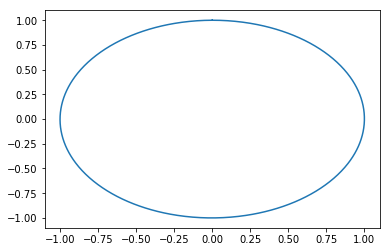

In [41]:
plt.plot(ys, xs)